In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [3]:
d = pd.read_csv(r"C:\Users\vvip3\OneDrive\Desktop\GradProject3127\Modeling\Phishing_Legitimate_Importance.csv")


In [4]:
d.head()

,id,NumDots,SubdomainLevel,UrlLength,NumDash,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,NumSensitiveWords,PctExtHyperlinks,InsecureForms,AbnormalFormAction,MissingTitle,CLASS_LABEL
0,1,3,1,72,0,0,0,0,0,0,0,0,1,0,0,0.000,1,0,0,1
1,2,3,1,144,0,0,0,2,0,1,0,41,1,0,1,0.000,1,0,0,1
2,3,3,1,58,0,0,0,0,0,0,0,0,1,0,0,0.375,1,0,0,1
3,4,3,1,79,1,0,0,0,0,0,0,0,1,0,0,1.000,1,0,0,1
4,5,3,0,46,0,0,0,0,0,0,0,2,1,1,0,1.000,0,0,0,1


In [30]:
d.shape

(10000, 20)

In [31]:
d.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'UrlLength', 'NumDash', 'AtSymbol',
       'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'NumSensitiveWords',
       'PctExtHyperlinks', 'InsecureForms', 'AbnormalFormAction',
       'MissingTitle', 'CLASS_LABEL'],
      dtype='object')

In [5]:
#split data into x(features) and y(label)
col = [ 'NumDots', 'SubdomainLevel', 'UrlLength', 'NumDash', 'AtSymbol',
       'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'NumSensitiveWords',
       'PctExtHyperlinks', 'InsecureForms', 'AbnormalFormAction',
       'MissingTitle']

X = d[col].values
Y = d['CLASS_LABEL'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)


In [33]:
print(X.shape)
print(Y.shape)

(10000, 18)
(10000,)


In [34]:
#drop null value from the dataset
d.dropna(inplace=True)

In [35]:
#to check if theres any nulll values in the dataset
from pandas.core.api import isnull
d.isnull().sum()

id                    0
NumDots               0
SubdomainLevel        0
UrlLength             0
NumDash               0
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumPercent            0
NumAmpersand          0
NumHash               0
NumNumericChars       0
NoHttps               0
RandomString          0
NumSensitiveWords     0
PctExtHyperlinks      0
InsecureForms         0
AbnormalFormAction    0
MissingTitle          0
CLASS_LABEL           0
dtype: int64

<AxesSubplot: >

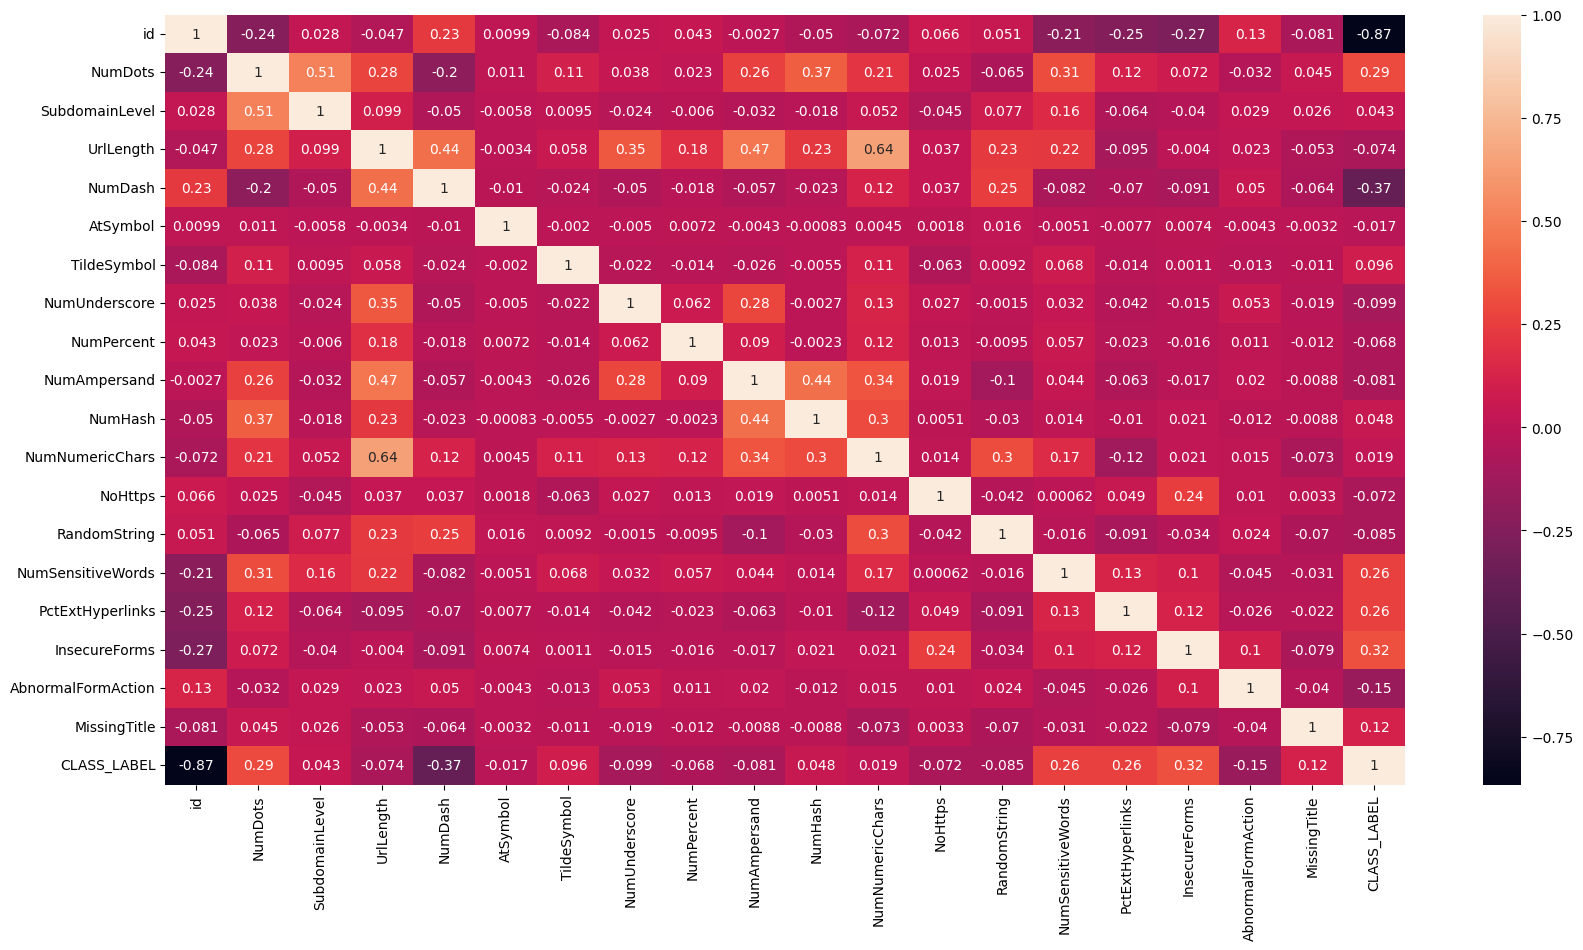

In [36]:
#aplly advance data visualization to check the correlation between the features
plt.figure(figsize=(20,10))
sns.heatmap(d.corr(), annot=True)


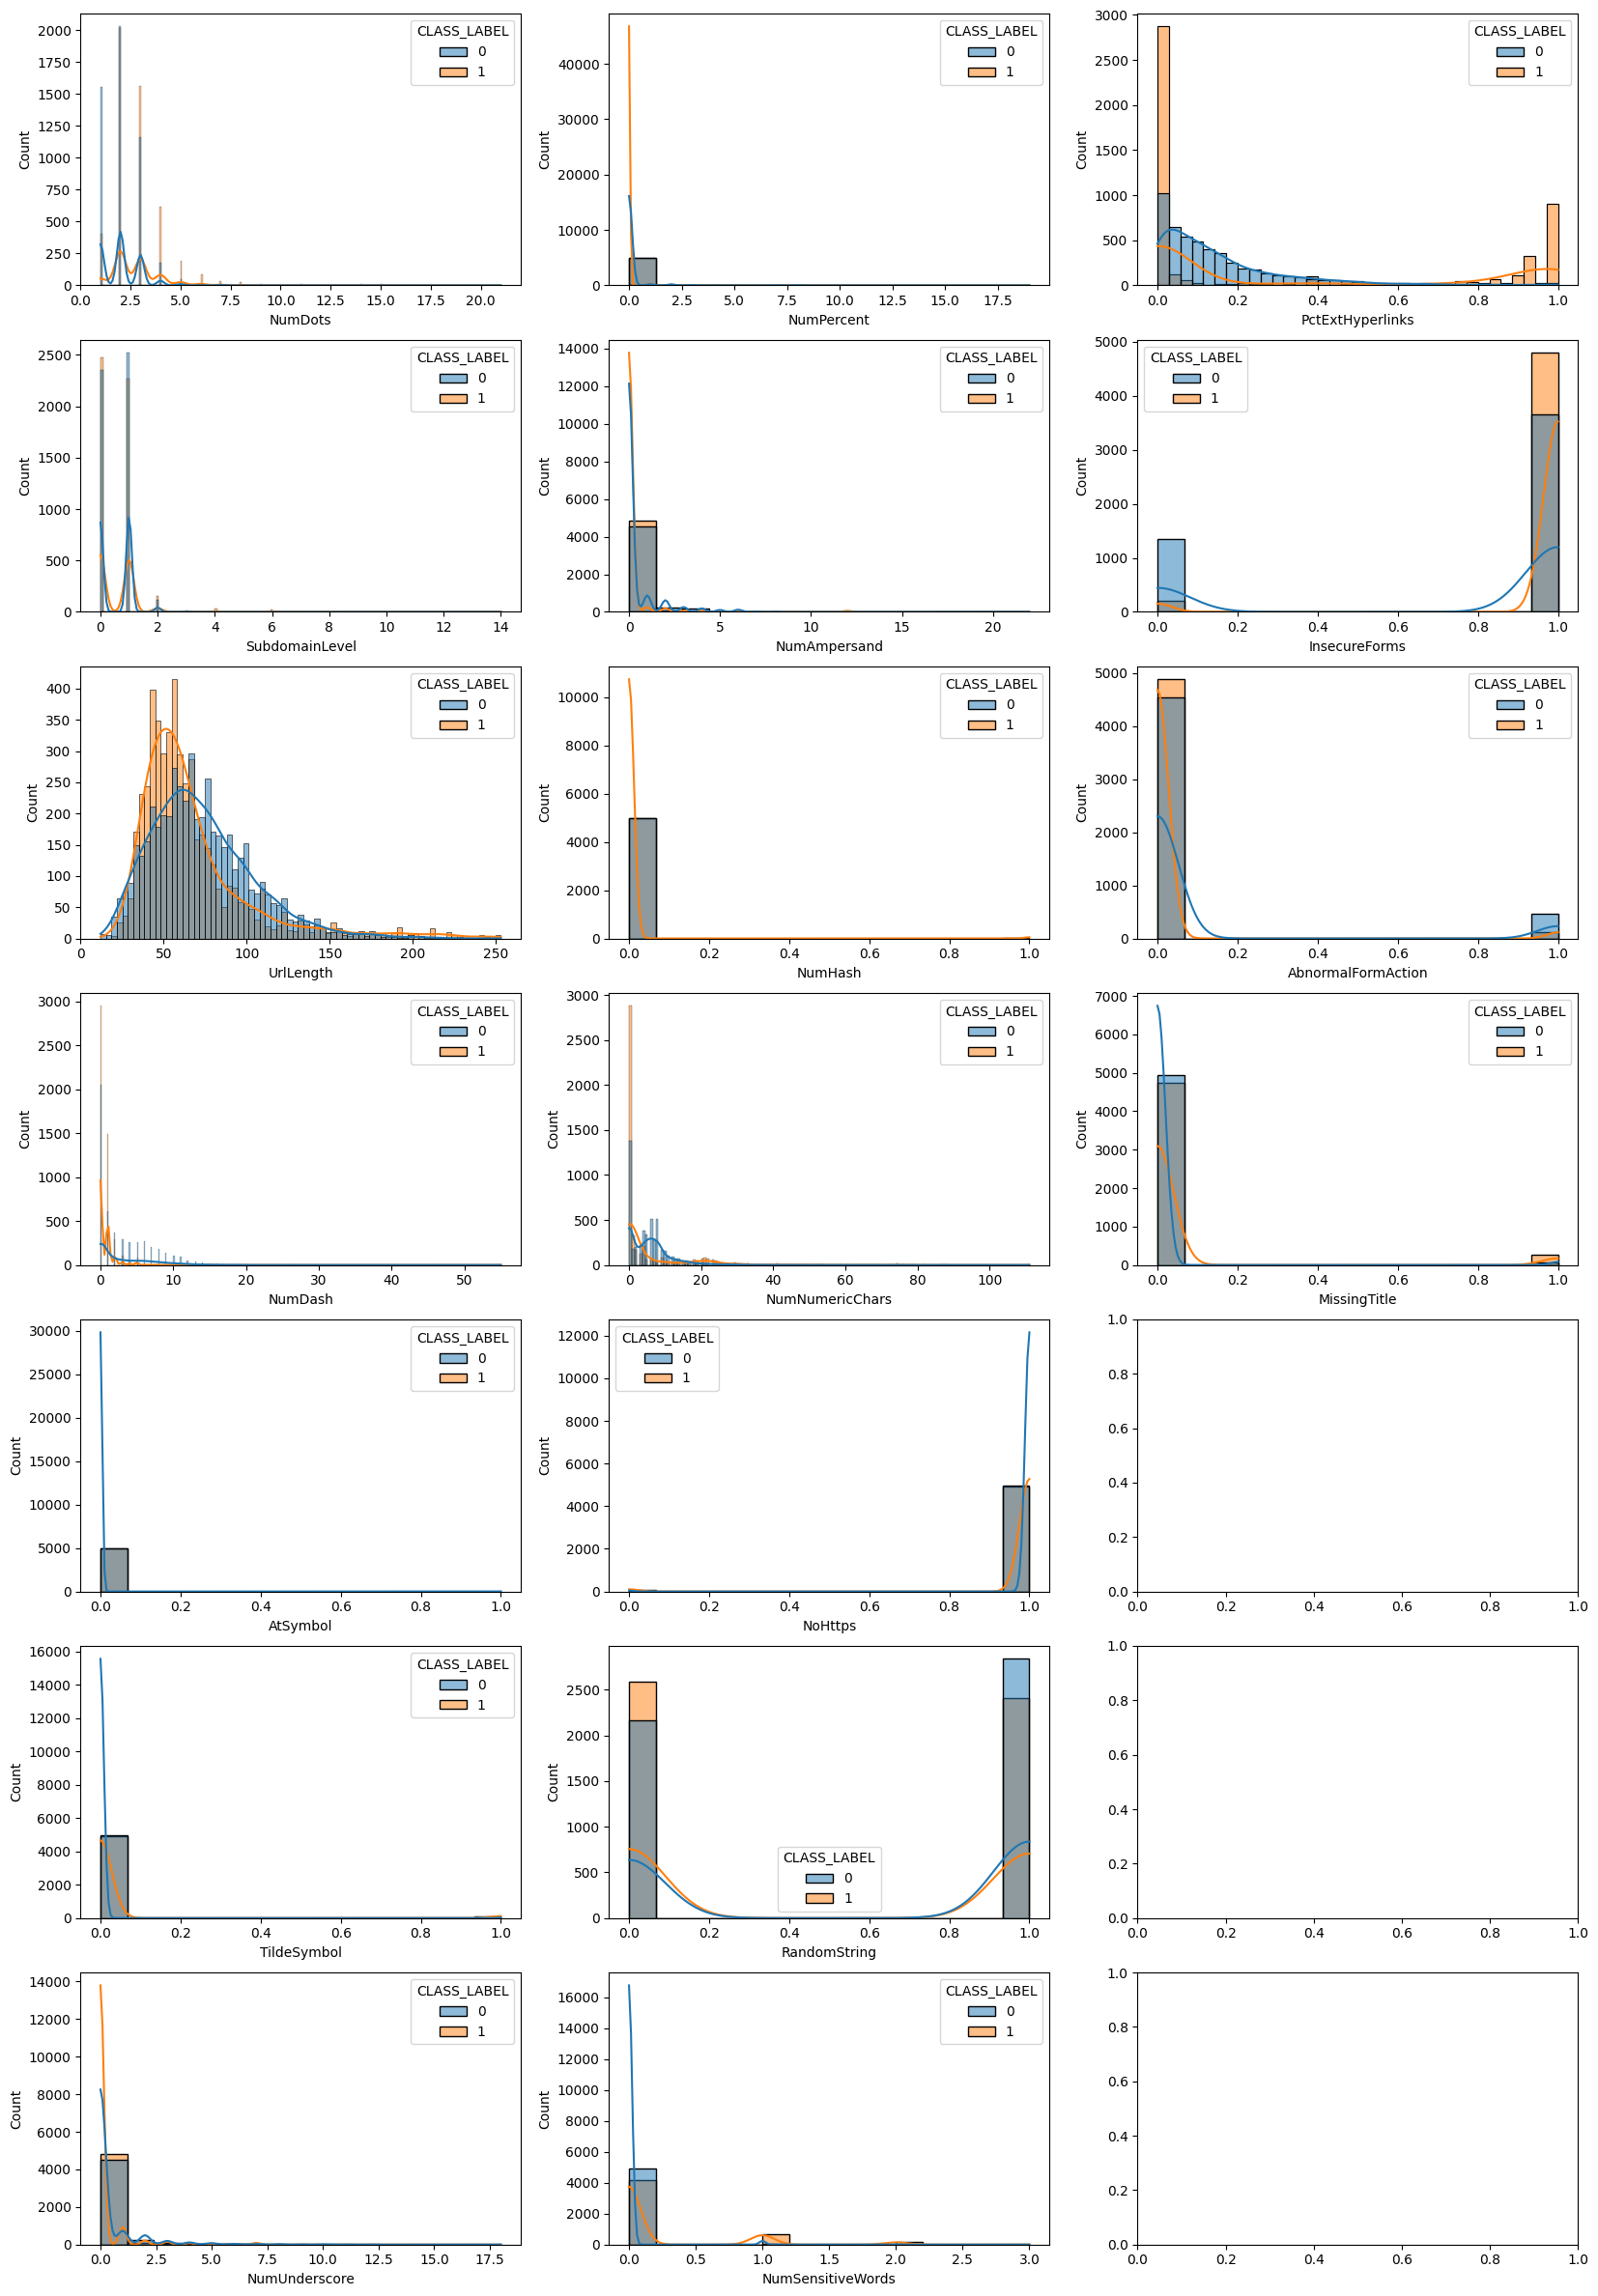

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(7, 3, figsize=(20, 30))
place1=0
place2=0
for i in col:
    sns.histplot(data=d, x=i, hue="CLASS_LABEL", kde=True, color="skyblue", ax=axs[place1, place2])
    if(place1==6):
        place1=0
        place2=place2+1
    else:
        place1=place1+1
plt.show()

In [38]:
corr= d.corr()
corr

,id,NumDots,SubdomainLevel,UrlLength,NumDash,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,NumSensitiveWords,PctExtHyperlinks,InsecureForms,AbnormalFormAction,MissingTitle,CLASS_LABEL
id,1.000000,-0.238066,0.027976,-0.046967,0.231091,0.009916,-0.084148,0.024811,0.042614,-0.002700,-0.050400,-0.072220,0.065735,0.050651,-0.214784,-0.245957,-0.274347,0.130747,-0.081004,-0.866025
NumDots,-0.238066,1.000000,0.507992,0.277380,-0.198769,0.011425,0.109508,0.038068,0.022616,0.255404,0.371642,0.211384,0.024590,-0.064631,0.305793,0.116726,0.072103,-0.031990,0.045291,0.294111
SubdomainLevel,0.027976,0.507992,1.000000,0.098579,-0.050018,-0.005845,0.009518,-0.023593,-0.006003,-0.031766,-0.018054,0.051744,-0.044628,0.076544,0.158365,-0.063890,-0.040207,0.029142,0.026432,0.043132
UrlLength,-0.046967,0.277380,0.098579,1.000000,0.437313,-0.003425,0.058233,0.350756,0.184947,0.466038,0.227029,0.637872,0.036667,0.230698,0.223492,-0.095430,-0.004030,0.023152,-0.053222,-0.074493
NumDash,0.231091,-0.198769,-0.050018,0.437313,1.000000,-0.010139,-0.024395,-0.050195,-0.017938,-0.056693,-0.023398,0.121830,0.036594,0.248141,-0.081733,-0.070490,-0.091292,0.049723,-0.064450,-0.372235
AtSymbol,0.009916,0.011425,-0.005845,-0.003425,-0.010139,1.000000,-0.001996,-0.005023,0.007226,-0.004298,-0.000832,0.004545,0.001844,0.016471,-0.005135,-0.007698,0.007448,-0.004283,-0.003160,-0.017323
TildeSymbol,-0.084148,0.109508,0.009518,0.058233,-0.024395,-0.001996,1.000000,-0.022361,-0.013665,-0.026223,-0.005532,0.111735,-0.062954,0.009156,0.068413,-0.013789,0.001057,-0.013384,-0.011051,0.095864
NumUnderscore,0.024811,0.038068,-0.023593,0.350756,-0.050195,-0.005023,-0.022361,1.000000,0.061638,0.279688,-0.002685,0.131965,0.027451,-0.001518,0.032299,-0.042287,-0.015282,0.052693,-0.019348,-0.098869
NumPercent,0.042614,0.022616,-0.006003,0.184947,-0.017938,0.007226,-0.013665,0.061638,1.000000,0.089819,-0.002340,0.121789,0.012623,-0.009526,0.056811,-0.023418,-0.016331,0.010686,-0.011620,-0.068465
NumAmpersand,-0.002700,0.255404,-0.031766,0.466038,-0.056693,-0.004298,-0.026223,0.279688,0.089819,1.000000,0.436500,0.336427,0.018750,-0.104465,0.044426,-0.062698,-0.016666,0.019720,-0.008750,-0.081446


<AxesSubplot: >

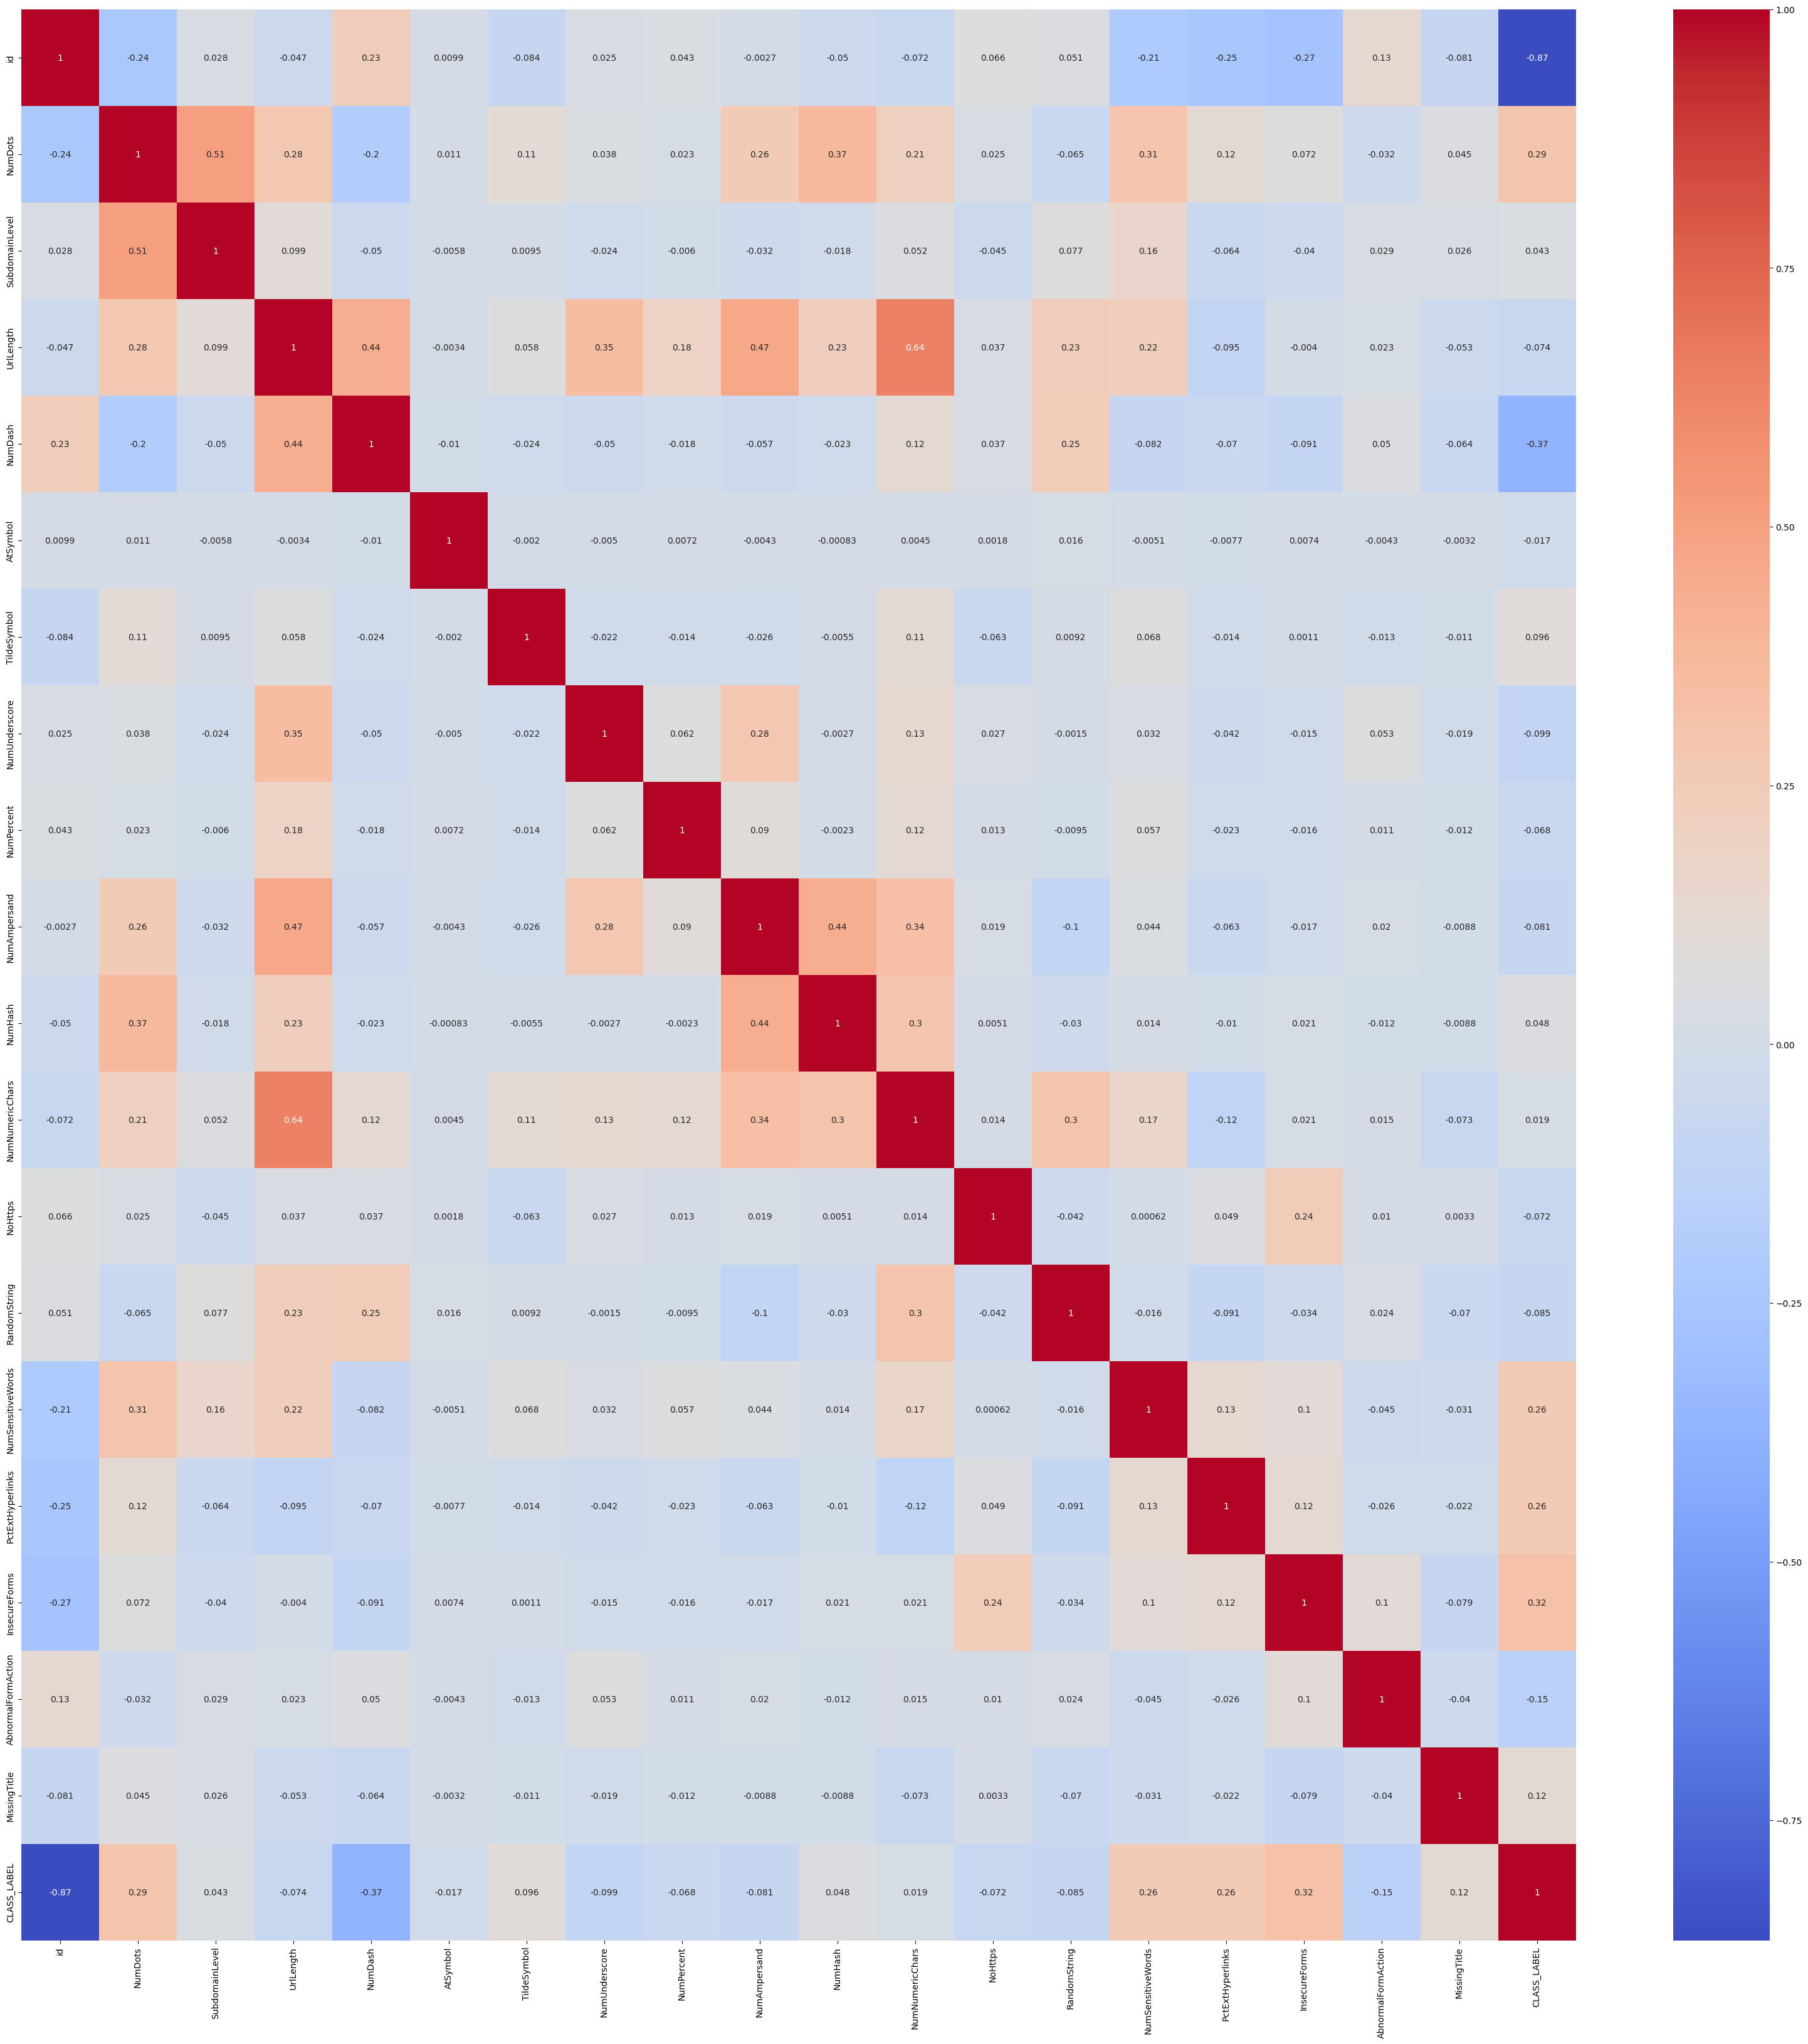

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
corr= d.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [40]:
# remove the highly correlated features
corr_matrix = d[col].corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
col = [c for c in col if c not in to_drop]
# print(corr_matrix)


In [8]:
# Split the dataset into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [9]:
# Print the shapes of the resulting datasets
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (8000, 18)
Testing set shape: (2000, 18)


In [43]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [44]:
# Scale the feature set using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(x_train.astype(float))
X_test_scaled = n_scaler.transform(x_test.astype(float))

In [46]:
# fit a Random Forest classifier to the data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

Accuracy: 0.949
[[993  46]
 [ 56 905]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1039
           1       0.95      0.94      0.95       961

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



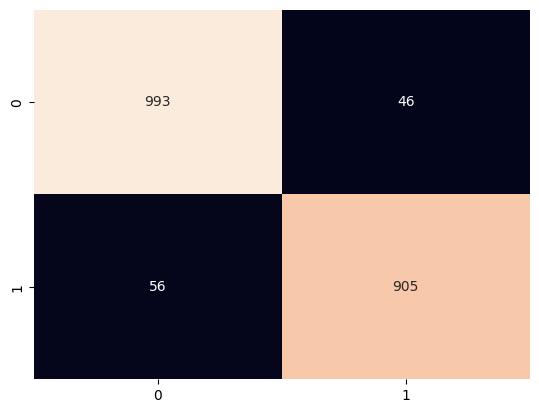

In [48]:
# Predict the labels of the test set: y_pred
y_pred = rf.predict(X_test_scaled)

#plot the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(cm)
sns.heatmap(cm, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_pred))


In [49]:
#apply cross validation to the model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train_scaled, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 95.41 %
Standard Deviation: 0.78 %


In [54]:
#apply random search to find the best parameters
from sklearn.model_selection import RandomizedSearchCV
parameters = [{'n_estimators': [10, 100, 1000], 'max_depth': [None, 2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10] }]
random_search = RandomizedSearchCV(estimator = rf,
                            param_distributions = parameters,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
random_search = random_search.fit(X_train_scaled, y_train)
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
 


Best Accuracy: 94.96 %
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}


In [55]:
#apply grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 100, 1000], 'max_depth': [None, 2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10]}]
grid_search = GridSearchCV(estimator = rf,
                            param_grid = parameters,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)
grid_search = grid_search.fit(X_train_scaled, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)




Best Accuracy: 95.62 %
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 1000}


Accuracy: 0.9455
[[992  47]
 [ 62 899]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1039
           1       0.95      0.94      0.94       961

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



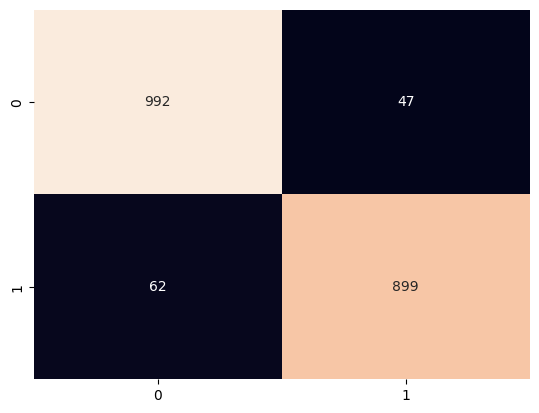

In [56]:
# fit the model to this Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, max_depth=10)
rf.fit(X_train_scaled, y_train)
#print the confusion matrix and classification report for this model
y_pred = rf.predict(X_test_scaled)
cm= confusion_matrix(y_test,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(cm)
sns.heatmap(cm, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_pred))


Accuracy: 0.951
[[994  45]
 [ 53 908]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1039
           1       0.95      0.94      0.95       961

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



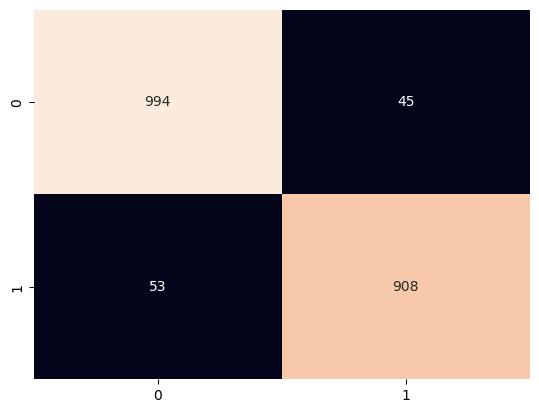

In [57]:
# fit the model to this Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 1000}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, min_samples_split=5, n_estimators=1000)
rf.fit(X_train_scaled, y_train)
#print the confusion matrix and classification report for this model
y_pred = rf.predict(X_test_scaled)
cm= confusion_matrix(y_test,y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(cm)
sns.heatmap(cm, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_pred))
